In [ ]:
import os
import glob
import json

import cv2
import pandas as pd 
from pycocotools.coco import COCO
from PIL import Image
import numpy as np 
import skimage.io as io
from matplotlib import pyplot as plt
from pprint import pprint
%matplotlib inline

In [3]:
with open('annotations.json', 'r', encoding='utf8') as file:
    data = json.load(file)

In [4]:
data.keys()

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])

In [5]:
print(len(data['images']))
# Let's print out the first few image filenames/paths
for img in data['images'][:10]:
    print(img['file_name'])


8729
images/t001/CAluWEgwPX.JPG
images/t001/EKyrFKHQzh.JPG
images/t001/ELAvEqeXxT.JPG
images/t001/IxRLFwTGCv.JPG
images/t001/LKCJAhfLBJ.JPG
images/t001/LZystXlIqe.JPG
images/t001/OiaMESWPyh.JPG
images/t001/VMyJozldvy.jpg
images/t001/XhbkFIOvZr.JPG
images/t001/ZKnMahXQgJ.JPG


In [6]:
# Let's see first annotation
for ann in data['annotations'][:1]:
    for key, value in ann.items():
        print(key)
        print(value)
        print("********")
    print("--------------------------------")

id
1
********
image_id
1
********
category_id
3
********
segmentation
{'counts': [858927, 7, 1322, 23, 1306, 34, 1298, 36, 1296, 39, 1292, 42, 1291, 43, 1289, 45, 1287, 47, 1285, 48, 1285, 49, 1283, 51, 1281, 53, 1280, 54, 1278, 56, 1277, 56, 1277, 57, 1275, 58, 1274, 60, 1273, 61, 1272, 61, 1272, 62, 1270, 63, 1269, 64, 1268, 65, 1268, 65, 1268, 66, 1267, 67, 1266, 67, 1265, 68, 1264, 69, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1262, 71, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1260, 73, 1260, 73, 1260, 73, 1259, 74, 1258, 75, 1258, 74, 1259, 73, 1260, 72, 1261, 71, 1262, 69, 1263, 69, 1264, 68, 1265, 66, 1266, 64, 1269, 63, 1269, 61, 1272, 59, 1274, 58, 1275, 55, 1278, 52, 1281, 15, 8, 25, 1285, 12, 16, 17, 1289, 9, 24, 3, 1297, 7, 1327, 4, 1715124], 'size': [1333, 2000]}
********
area
4065.0
********
bbox
[644.0, 441.0, 70.0, 78.0]
********
iscrowd
1
********
attributes
{'orientation': 'left', 'occluded': False}
********
-------------

In [7]:
# initialise COCO API for annotations
coco = COCO('annotations.json')

loading annotations into memory...
Done (t=5.53s)
creating index...
index created!


In [8]:
for key in coco.anns.keys():
    pprint(coco.anns[key])
    break 

{'area': 4065.0,
 'attributes': {'occluded': False, 'orientation': 'left'},
 'bbox': [644.0, 441.0, 70.0, 78.0],
 'category_id': 3,
 'id': 1,
 'image_id': 1,
 'iscrowd': 1,
 'segmentation': {'counts': [858927,
                             7,
                             1322,
                             23,
                             1306,
                             34,
                             1298,
                             36,
                             1296,
                             39,
                             1292,
                             42,
                             1291,
                             43,
                             1289,
                             45,
                             1287,
                             47,
                             1285,
                             48,
                             1285,
                             49,
                             1283,
                             51,
          

In [9]:
for i in range(1,4):
    print(coco.cats[i])

{'id': 1, 'name': 'turtle', 'supercategory': ''}
{'id': 2, 'name': 'flipper', 'supercategory': ''}
{'id': 3, 'name': 'head', 'supercategory': ''}


In [10]:
# you can also get all categories using coco.getCatIds
coco.getCatIds()

[1, 2, 3]

In [11]:
# get metadata of coco categories
coco.loadCats(coco.getCatIds()) # returns dictionary

[{'id': 1, 'name': 'turtle', 'supercategory': ''},
 {'id': 2, 'name': 'flipper', 'supercategory': ''},
 {'id': 3, 'name': 'head', 'supercategory': ''}]

In [12]:
for key in coco.imgs.keys():
    pprint(coco.imgs[key])
    break

{'coco_url': '',
 'date_captured': 0,
 'file_name': 'images/t001/CAluWEgwPX.JPG',
 'flickr_url': '',
 'height': 1333,
 'id': 1,
 'identity': 't001',
 'license': 0,
 'timestamp': '2014:07:14 14:49:45',
 'width': 2000}


In [13]:
im = coco.loadImgs(4103)[0]
pprint(im)

{'coco_url': '',
 'date_captured': 0,
 'file_name': 'images/t234/FTSuKddpLd.jpeg',
 'flickr_url': '',
 'height': 2000,
 'id': 4103,
 'identity': 't234',
 'license': 0,
 'timestamp': '2021:06:25 17:42:38',
 'width': 1333}


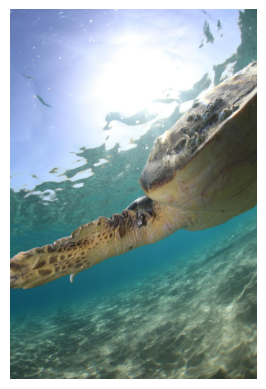

In [14]:
I = io.imread(im['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [19]:
import traceback

for image_id in range(1, len(data['images'])):
    try:
        img = coco.imgs[image_id]
        image = np.array(Image.open(img['file_name']))
        cat_ids = coco.getCatIds()
        
        # 检查是否有3个类别
        if len(cat_ids) == 3:
            anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
            anns = coco.loadAnns(anns_ids)
            if anns:
                mask = coco.annToMask(anns[0])
                for i in range(len(anns)):
                    mask += coco.annToMask(anns[i])
                np.save(f"./images_label_id/{image_id}_mask.npy", mask) 
            else:
                print(f"No annotations for image_id: {image_id}")
        else:
            print(f'{image_id} categories are more than 3')
    except Exception as e:
        print(f"Error in image_id {image_id}: {e}")
        traceback.print_exc()  # 打印详细的异常信息
        break

Error in image_id 1: [Errno 2] No such file or directory: './images_label_id/1_mask.npy'


Traceback (most recent call last):
  File "/tmp/ipykernel_6072/2982144919.py", line 17, in <module>
    np.save(f"./images_label_id/{image_id}_mask.npy", mask)
  File "/root/miniconda3/lib/python3.10/site-packages/numpy/lib/npyio.py", line 542, in save
    file_ctx = open(file, "wb")
FileNotFoundError: [Errno 2] No such file or directory: './images_label_id/1_mask.npy'


In [125]:
img = coco.imgs[2]
image = np.array(Image.open(img['file_name']))
cat_ids = coco.getCatIds()
pprint(cat_ids)
# 检查是否有3个类别
if len(cat_ids) == 3:
    anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
    anns = coco.loadAnns(anns_ids)
    pprint(len(anns))


[1, 2, 3]
6


In [ ]:
for image_id in range(1,8730):
    try:
        print(image_id)
        img = coco.imgs[image_id]
        image = np.array(Image.open(img['file_name']))
        cat_ids = coco.getCatIds()
        anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
        anns = coco.loadAnns(anns_ids)
        mask = coco.annToMask(anns[0])
        for i in range(len(anns)):
            mask += coco.annToMask(anns[i])
        original_file_path = img['file_name']  
        new_file_path = original_file_path.replace('images/', 'images_label_npv/').replace('.JPG', '').replace('.jpg', '').replace('.jpeg', '')
        print(new_file_path)
        os.makedirs(os.path.dirname(new_file_path), exist_ok=True)
        np.save(new_file_path, mask) 
    except:
        continue

Unique values in mask and their counts: {0: 2062005, 1: 512479, 2: 81790, 3: 9726}


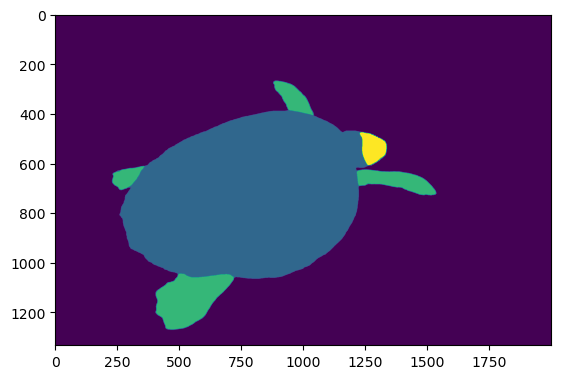

In [127]:
a=np.load('./images_label_id/32_mask.npy')
unique_values, counts = np.unique(a, return_counts=True)
print("Unique values in mask and their counts:", dict(zip(unique_values, counts)))
plt.imshow(a)

In [17]:
split_info = pd.read_csv('metadata_splits.csv')
print(split_info.split_open)

0       train
1       train
2       train
3       train
4       train
        ...  
8724     test
8725     test
8726     test
8727     test
8728     test
Name: split_open, Length: 8729, dtype: object


In [15]:
def extract_and_resize_region(image: np.ndarray, original_img: np.ndarray,target_values: list, new_size: tuple) -> tuple:
    # 如果图像是多通道（如 RGB），先转换为灰度图像
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 创建一个掩码，仅保留像素值为 target_values 的区域
    mask = np.isin(image, target_values)
    
    # 将 mask 转换为 uint8 类型并标记区域
    mask = (mask * 255).astype(np.uint8)

    # 查找包含指定像素值区域的边界框
    coords = cv2.findNonZero(mask)  # 获取非零像素点的坐标
    if coords is None:  # 如果没有找到指定的像素值区域
        print("No specified pixel values found in the image.")
        return None
    
    x, y, w, h = cv2.boundingRect(coords)  # 获取包含所有非零像素点的边界框

    # 裁剪出感兴趣区域
    region = image[y:y+h, x:x+w]
    region_original = original_img[y:y+h, x:x+w]
    # 调整大小
    resized_region = cv2.resize(region, new_size)
    resized_original = cv2.resize(region_original, new_size)
    return resized_region, resized_original

def adjust_pixel_values_fast(image: np.ndarray) -> np.ndarray:
    """
    快速调整图像中像素值的范围：
    - 将 1-85 范围的值设置为 85
    - 将 86-170 范围的值设置为 170
    - 将 171-255 范围的值设置为 255
    - 保持 0 值不变
    """
    adjusted_image = np.where((image > 0) & (image <= 85), 85, image)
    adjusted_image = np.where((adjusted_image > 85) & (adjusted_image <= 170), 170, adjusted_image)
    adjusted_image = np.where((adjusted_image > 170) & (adjusted_image <= 255), 255, adjusted_image)
    return adjusted_image

In [18]:
# final choice
count = 0
for image_id in range(1,8730):
    try:
        # img_ori = coco.loadImgs(image_id)
        img_info = coco.loadImgs(image_id)[0] 
        file_name = img_info['file_name']
        turtle_mask = coco.getAnnIds(imgIds=image_id, catIds=1, iscrowd=None)        # entire of the turtle
        leg_mask = coco.getAnnIds(imgIds=image_id, catIds=2, iscrowd=None)        # legs of the turtle
        head_mask = coco.getAnnIds(imgIds=image_id, catIds=3, iscrowd=None)        # Head of the turtle
        turtle_mask = coco.loadAnns(turtle_mask)
        leg_mask = coco.loadAnns(leg_mask)
        head_mask = coco.loadAnns(head_mask)
        mask1 = coco.annToMask(turtle_mask[0])
        for i in range(1, len(turtle_mask)):
            mask1 += coco.annToMask(turtle_mask[i])
        mask2 = np.zeros_like(mask1)
        for i in range(len(leg_mask)):
            mask2 += coco.annToMask(leg_mask[i])
        mask3 = np.zeros_like(mask2)
        for i in range(len(head_mask)):
            mask3 += coco.annToMask(head_mask[i])
        mask3[mask3 > 0] = 2
        mask2[mask2 > 0] = 1
        mask1[mask1 > 0] = 1
        mask = mask1 + mask2 
        mask[mask > 1] = 2
        mask = mask + mask3
        mask[mask > 2] = 3
        unique_values, counts = np.unique(mask, return_counts=True)
        if len(unique_values) == 4:
            mask = mask * 85 
            # print(file_name)
            # original_file_path = file_name 
            if(split_info.split_open[image_id-1] == 'train'):
                original_path = './mask_train/'
                path_formerimg = './img_train/'
            elif(split_info.split_open[image_id-1] == 'test'):
                original_path = './mask_test/'
                path_formerimg = './img_test/'
            elif(split_info.split_open[image_id-1] == 'valid'):
                original_path = './mask_valid/'
                path_formerimg = './img_valid/'
            # new_file_path = original_file_path.replace('images/', 'images_label_pictures/').replace('.JPG', '.PNG').replace('.jpg', '.PNG').replace('.jpeg', '.PNG')
            new_file_path = original_path + str(image_id) + '.png'
            new_img_path = path_formerimg + str(image_id) + '.jpeg'
            # print(new_img_path)
            # print(new_file_path)
            os.makedirs(os.path.dirname(new_file_path), exist_ok=True)
            mask_image = np.array(mask, dtype=np.uint8)
            # mask_image.save(new_file_path,format='PNG')
            I = io.imread(img_info['file_name'])
            # io.imsave(new_img_path,I)
            resized_mask, resized_original = extract_and_resize_region(mask_image, I, [85,170,255], (512, 512))
            resized_mask_adjust = adjust_pixel_values_fast(resized_mask)
            mask_image = Image.fromarray(resized_mask_adjust.astype(np.uint8))
            mask_image.save(new_file_path,format='PNG')
            resized_original_rgb = cv2.cvtColor(resized_original, cv2.COLOR_BGR2RGB)
            io.imsave(new_img_path,resized_original_rgb)
        else:
            count+=1
            print(f'{image_id} components are incomplete.')
    except Exception as e:
        count+=1
        print(f"Error for image_id {image_id}: {e}")
        continue
        
print(count)

56 components are incomplete.
73 components are incomplete.
115 components are incomplete.
211 components are incomplete.
259 components are incomplete.
260 components are incomplete.
275 components are incomplete.
276 components are incomplete.
281 components are incomplete.
443 components are incomplete.
506 components are incomplete.
541 components are incomplete.
610 components are incomplete.
651 components are incomplete.
809 components are incomplete.
837 components are incomplete.
874 components are incomplete.
878 components are incomplete.
883 components are incomplete.
908 components are incomplete.
932 components are incomplete.
933 components are incomplete.
934 components are incomplete.
944 components are incomplete.
956 components are incomplete.
970 components are incomplete.
1085 components are incomplete.
1094 components are incomplete.
1154 components are incomplete.
1234 components are incomplete.
1287 components are incomplete.
1313 components are incomplete.
1316

/tmp/ipykernel_953/4094771989.py:59: UserWarning: ./img_valid/4186.jpeg is a low contrast image
  io.imsave(new_img_path,resized_original_rgb)


4187 components are incomplete.
4198 components are incomplete.
4226 components are incomplete.
4236 components are incomplete.
4264 components are incomplete.
4290 components are incomplete.


/tmp/ipykernel_953/4094771989.py:59: UserWarning: ./img_train/4310.jpeg is a low contrast image
  io.imsave(new_img_path,resized_original_rgb)


4320 components are incomplete.
4330 components are incomplete.
4372 components are incomplete.
4438 components are incomplete.
4443 components are incomplete.
Error for image_id 4566: list index out of range
4688 components are incomplete.
4692 components are incomplete.
4695 components are incomplete.
4698 components are incomplete.
4735 components are incomplete.
4879 components are incomplete.
5363 components are incomplete.
5364 components are incomplete.
5431 components are incomplete.
5492 components are incomplete.
5497 components are incomplete.
5500 components are incomplete.
5525 components are incomplete.
5685 components are incomplete.
5710 components are incomplete.
5804 components are incomplete.
5827 components are incomplete.


/tmp/ipykernel_953/4094771989.py:59: UserWarning: ./img_test/5850.jpeg is a low contrast image
  io.imsave(new_img_path,resized_original_rgb)


5946 components are incomplete.
5949 components are incomplete.
Error for image_id 5950: list index out of range
5951 components are incomplete.
5973 components are incomplete.
5984 components are incomplete.
6003 components are incomplete.


/tmp/ipykernel_953/4094771989.py:59: UserWarning: ./img_train/6065.jpeg is a low contrast image
  io.imsave(new_img_path,resized_original_rgb)


6115 components are incomplete.
6141 components are incomplete.
6146 components are incomplete.
6150 components are incomplete.
6169 components are incomplete.
6178 components are incomplete.
6219 components are incomplete.
6325 components are incomplete.
6327 components are incomplete.
6341 components are incomplete.
6345 components are incomplete.
6356 components are incomplete.
6467 components are incomplete.
6471 components are incomplete.
6482 components are incomplete.
6563 components are incomplete.
6593 components are incomplete.
6598 components are incomplete.
6603 components are incomplete.
6605 components are incomplete.
6621 components are incomplete.
Error for image_id 6728: list index out of range
Error for image_id 6729: list index out of range
Error for image_id 6730: list index out of range
Error for image_id 6731: list index out of range
Error for image_id 6732: list index out of range
Error for image_id 6733: list index out of range
Error for image_id 6734: list inde

/tmp/ipykernel_953/4094771989.py:59: UserWarning: ./img_test/7964.jpeg is a low contrast image
  io.imsave(new_img_path,resized_original_rgb)


7985 components are incomplete.
8010 components are incomplete.
8077 components are incomplete.
8086 components are incomplete.
8171 components are incomplete.
8190 components are incomplete.
8386 components are incomplete.
Error for image_id 8436: list index out of range
8633 components are incomplete.
8698 components are incomplete.
8723 components are incomplete.
221


In [123]:
img_info = coco.loadImgs(4103)[0] 
file_name = img_info['file_name']
turtle_mask = coco.getAnnIds(imgIds=4103, catIds=1, iscrowd=None)        # entire of the turtle
leg_mask = coco.getAnnIds(imgIds=4103, catIds=2, iscrowd=None)        # legs of the turtle
head_mask = coco.getAnnIds(imgIds=4103, catIds=3, iscrowd=None)        # Head of the turtle
turtle_mask = coco.loadAnns(turtle_mask)
leg_mask = coco.loadAnns(leg_mask)
head_mask = coco.loadAnns(head_mask)
mask1 = coco.annToMask(turtle_mask[0])
for i in range(1, len(turtle_mask)):
    mask1 += coco.annToMask(turtle_mask[i])
mask2 = np.zeros_like(mask1)
for i in range(len(leg_mask)):
    mask2 += coco.annToMask(leg_mask[i])
mask3 = np.zeros_like(mask2)
for i in range(len(head_mask)):
    mask3 += coco.annToMask(head_mask[i])
mask3[mask3 > 0] = 2
mask2[mask2 > 0] = 1
mask1[mask1 > 0] = 1
mask = mask1 + mask2 
mask[mask > 1] = 2
mask = mask + mask3
mask[mask > 2] = 3
unique_values, counts = np.unique(mask, return_counts=True)
print(len(unique_values))
print("Unique values in mask and their counts:", dict(zip(unique_values, counts)))

3
Unique values in mask and their counts: {0: 2096373, 1: 391385, 2: 178242}


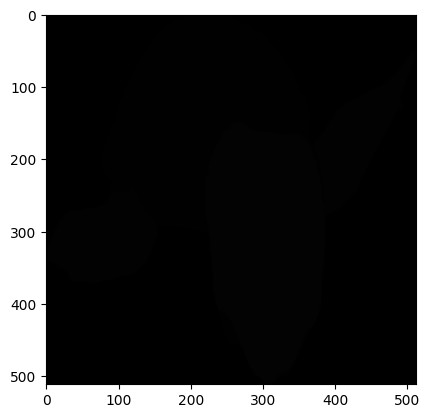

In [20]:
a = cv2.imread('./mask_valid/504.png')
plt.imshow(a)

In [21]:
unique_values, counts = np.unique(a, return_counts=True)
print(unique_values)

[0 1 2 3]


In [19]:
# 检查输入
import os
from PIL import Image

# 定义要检查图片大小的文件夹路径
folder_path = "/root/9517-group-project/unetPP/outputs/Try/1"

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    # 构造每个文件的完整路径
    file_path = os.path.join(folder_path, filename)
    
    # 检查文件是否是图片
    if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        try:
            
            image = cv2.imread(file_path)
            unique_values, counts = np.unique(image, return_counts=True)
            print(unique_values)
        except Exception as e:
            print(f"无法打开文件: {filename}, 错误: {e}")


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 27 28 29]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 23 24 26
 27 28 29]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 26]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 23 25 26 27]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 27 28]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 2

KeyboardInterrupt: 

In [ ]:
import os
from PIL import Image

# 定义要检查图片大小的文件夹路径
folder_path = "./img_train"
for filename in os.listdir(folder_path):
    # 构造每个文件的完整路径
    file_path = os.path.join(folder_path, filename)
    
    # 检查文件是否是图片
    if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        try:
            # 打开图片并获取大小
            with Image.open(file_path) as img:
                width, height = img.size
                print(f"图片: {filename}, 宽: {width}, 高: {height}")
        except Exception as e:
            print(f"无法打开文件: {filename}, 错误: {e}")
